## Word2Vec
- CBOW
- Skip-Gram

In [1]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import nltk
import gensim
import string
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np
import re


In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tanjina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tanjina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
corpus = [
    "my name is Proma.",
    "i used to teach introductory python!",
    "Hi, I'm Tanjina Proma, a passionate Machine Learning Engineer.",
    "I am enhancing my knowledge with the latest development in the field of Machine Learning and Data Science.",
    "I have worked for more than four years, and I have a record of successfully implementing Computer Vision and Image Processing based pipelines with practical expertise using MLOps, deep learning & machine learning.",
    "I am interested in enabling machine to understand sequence of information and act accordingly to make significant progress towards true artificial intelligence.",
    "nlp is veyy amazing field!",
    "i love working with nlp tasks, ml models, generative ai and agentic ai",
    "we will try to build two models here.",
    "word2vec and skip-gram .",
    "we will also work on cleaning the text data lso known as data preprocessing.",
    "my phone number is 23874875 2387465."
]

In [5]:
text = "my name is Proma 38745685 796 ."

In [6]:
text.lower()

'my name is proma 38745685 796 .'

In [7]:
re.sub(r'\d+', '', text)  

'my name is Proma   .'

In [8]:
string.punctuation  

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
text.translate(str.maketrans('', '', string.punctuation))  

'my name is Proma 38745685 796 '

In [10]:
word_tokenize(text)

['my', 'name', 'is', 'Proma', '38745685', '796', '.']

In [11]:
s1 =['my', 'name', 'is', 'Proma', '38745685', '796', '.']

In [12]:
[i for i in s1 if i not in stopwords.words('english')]

['name', 'Proma', '38745685', '796', '.']

#### data preprocessing function

In [13]:
def word_preprocessing(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  
    text = text.translate(str.maketrans('', '', string.punctuation))
    word = word_tokenize(text)
    word = [i for i in word if i not in stopwords.words('english')]
    return word
    

In [14]:
corpus

['my name is Proma.',
 'i used to teach introductory python!',
 "Hi, I'm Tanjina Proma, a passionate Machine Learning Engineer.",
 'I am enhancing my knowledge with the latest development in the field of Machine Learning and Data Science.',
 'I have worked for more than four years, and I have a record of successfully implementing Computer Vision and Image Processing based pipelines with practical expertise using MLOps, deep learning & machine learning.',
 'I am interested in enabling machine to understand sequence of information and act accordingly to make significant progress towards true artificial intelligence.',
 'nlp is veyy amazing field!',
 'i love working with nlp tasks, ml models, generative ai and agentic ai',
 'we will try to build two models here.',
 'word2vec and skip-gram .',
 'we will also work on cleaning the text data lso known as data preprocessing.',
 'my phone number is 23874875 2387465.']

In [15]:
processed_corpus = [word_preprocessing(sentence) for sentence in corpus]

In [16]:
processed_corpus

[['name', 'proma'],
 ['used', 'teach', 'introductory', 'python'],
 ['hi',
  'im',
  'tanjina',
  'proma',
  'passionate',
  'machine',
  'learning',
  'engineer'],
 ['enhancing',
  'knowledge',
  'latest',
  'development',
  'field',
  'machine',
  'learning',
  'data',
  'science'],
 ['worked',
  'four',
  'years',
  'record',
  'successfully',
  'implementing',
  'computer',
  'vision',
  'image',
  'processing',
  'based',
  'pipelines',
  'practical',
  'expertise',
  'using',
  'mlops',
  'deep',
  'learning',
  'machine',
  'learning'],
 ['interested',
  'enabling',
  'machine',
  'understand',
  'sequence',
  'information',
  'act',
  'accordingly',
  'make',
  'significant',
  'progress',
  'towards',
  'true',
  'artificial',
  'intelligence'],
 ['nlp', 'veyy', 'amazing', 'field'],
 ['love',
  'working',
  'nlp',
  'tasks',
  'ml',
  'models',
  'generative',
  'ai',
  'agentic',
  'ai'],
 ['try', 'build', 'two', 'models'],
 ['wordvec', 'skipgram'],
 ['also',
  'work',
  'clea

## word2vec CBOW VS Skipram

In [17]:
word2vec_cbow = Word2Vec(sentences = processed_corpus, vector_size = 100, window = 10, min_count = 1, sg = 0)
word2vec_skipgram = Word2Vec(sentences = processed_corpus, vector_size = 100, window = 10, min_count = 1, sg = 1)

In [18]:
word2vec_cbow

In [19]:
word2vec_skipgram

In [20]:
word2vec_skipgram.wv["ai"]

array([-8.7236259e-03,  2.0828398e-03, -8.7369350e-04, -9.2439074e-03,
       -9.3762856e-03, -1.4866444e-03,  4.4795196e-03,  3.8214300e-03,
       -6.5566930e-03, -6.9695772e-03, -4.9678897e-03, -2.4079967e-03,
       -7.2906869e-03, -9.6196746e-03, -2.6717056e-03, -8.3110258e-03,
       -6.0471087e-03, -5.7019885e-03, -2.3934965e-03, -1.8038847e-03,
       -8.9383181e-03, -6.0883985e-04,  8.0978647e-03,  7.7372203e-03,
       -7.2413990e-03, -3.6708664e-03,  3.0896831e-03, -9.6489144e-03,
        1.4507193e-03,  6.4820480e-03,  5.8010500e-03, -8.8288048e-03,
       -4.5063803e-03, -8.1918901e-03, -5.1669791e-05,  9.3725072e-03,
        6.0815103e-03,  5.1365225e-03,  5.0649708e-03, -3.3174907e-03,
        9.6529471e-03, -7.4124713e-03, -7.2568250e-03, -2.2146225e-03,
       -7.5528474e-04, -3.2050251e-03, -7.1904185e-04,  7.4768299e-03,
       -6.5419468e-04, -1.5903338e-03,  2.7973782e-03, -8.4222294e-03,
        7.8518745e-03,  8.4756101e-03, -9.6306335e-03,  2.4242797e-03,
      

In [21]:
word2vec_skipgram.vector_size

100

In [22]:
len(word2vec_skipgram.wv["ai"])

100

In [23]:
word2vec_skipgram.wv.most_similar('ai', topn=3)

[('intelligence', 0.31048333644866943),
 ('amazing', 0.28239017724990845),
 ('enabling', 0.19034555554389954)]

In [24]:
word2vec_cbow.wv["ai"]

array([-8.7275757e-03,  2.1133393e-03, -8.7001896e-04, -9.3169240e-03,
       -9.4280681e-03, -1.4377425e-03,  4.4558835e-03,  3.7347621e-03,
       -6.5408582e-03, -6.8848622e-03, -5.0022593e-03, -2.3185017e-03,
       -7.2701531e-03, -9.6048331e-03, -2.7162547e-03, -8.3614886e-03,
       -6.0364883e-03, -5.6862701e-03, -2.3775499e-03, -1.7325479e-03,
       -8.9398762e-03, -6.9574156e-04,  8.1502404e-03,  7.7015352e-03,
       -7.2186394e-03, -3.6648323e-03,  3.1097445e-03, -9.6009858e-03,
        1.4725939e-03,  6.5232380e-03,  5.7603987e-03, -8.7683443e-03,
       -4.5102159e-03, -8.1785256e-03,  2.0252432e-05,  9.2954738e-03,
        6.0072229e-03,  5.0741648e-03,  5.0485376e-03, -3.2619019e-03,
        9.5702996e-03, -7.3647117e-03, -7.2611929e-03, -2.2545599e-03,
       -7.6197827e-04, -3.2069101e-03, -6.2076969e-04,  7.5037684e-03,
       -6.8955240e-04, -1.6120339e-03,  2.7557830e-03, -8.3812494e-03,
        7.8592999e-03,  8.5176788e-03, -9.6030924e-03,  2.4384668e-03,
      

In [25]:
word2vec_cbow.wv.similarity('data', "ai")

0.064995416

In [26]:
word2vec_cbow.wv.index_to_key

['machine',
 'learning',
 'data',
 'field',
 'models',
 'ai',
 'nlp',
 'proma',
 'processing',
 'image',
 'vision',
 'computer',
 'worked',
 'based',
 'implementing',
 'successfully',
 'pipelines',
 'record',
 'practical',
 'years',
 'four',
 'expertise',
 'number',
 'development',
 'science',
 'mlops',
 'latest',
 'knowledge',
 'enhancing',
 'engineer',
 'passionate',
 'tanjina',
 'im',
 'hi',
 'python',
 'introductory',
 'teach',
 'used',
 'using',
 'interested',
 'deep',
 'phone',
 'ml',
 'generative',
 'agentic',
 'try',
 'build',
 'two',
 'wordvec',
 'skipgram',
 'also',
 'work',
 'cleaning',
 'text',
 'lso',
 'known',
 'preprocessing',
 'tasks',
 'working',
 'love',
 'make',
 'enabling',
 'understand',
 'sequence',
 'information',
 'act',
 'accordingly',
 'significant',
 'amazing',
 'progress',
 'towards',
 'true',
 'artificial',
 'intelligence',
 'veyy',
 'name']

In [27]:
word2vec_cbow.wv.most_similar('proma', topn=5)

[('years', 0.31945371627807617),
 ('progress', 0.23871637880802155),
 ('used', 0.20374082028865814),
 ('love', 0.1988079994916916),
 ('information', 0.19479957222938538)]

In [28]:
word2vec_skipgram.wv.most_similar('proma', topn=5)

[('years', 0.3202421963214874),
 ('progress', 0.23871521651744843),
 ('used', 0.20373831689357758),
 ('love', 0.19888168573379517),
 ('information', 0.19586768746376038)]

In [29]:
corpus = [
    "my name is Proma.",
    "i used to teach introductory python!",
    "Hi, I'm Tanjina Proma, a passionate Machine Learning Engineer.",
    "I am enhancing my knowledge with the latest development in the field of Machine Learning and Data Science.",
    "I have worked for more than four years, and I have a record of successfully implementing Computer Vision and Image Processing based pipelines with practical expertise using MLOps, deep learning & machine learning.",
    "I am interested in enabling machine to understand sequence of information and act accordingly to make significant progress towards true artificial intelligence.",
    "nlp is veyy amazing field!",
    "i love working with nlp tasks, ml models, generative ai and agentic ai",
    "we will try to build two models here.",
    "word2vec and skip-gram .",
    "we will also work on cleaning the text data lso known as data preprocessing.",
    "my phone number is 23874875 2387465."
]

In [30]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

In [31]:
word_vectors = word2vec_cbow.wv
vocab = list(word_vectors.index_to_key)

In [32]:
len(vocab)

76

In [33]:
x = np.array([word_vectors[i] for i in vocab])

In [34]:
tsne = TSNE(n_components=2)

In [35]:
pip install threadpoolctl --upgrade


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
x_new_embeddings = tsne.fit_transform(x)

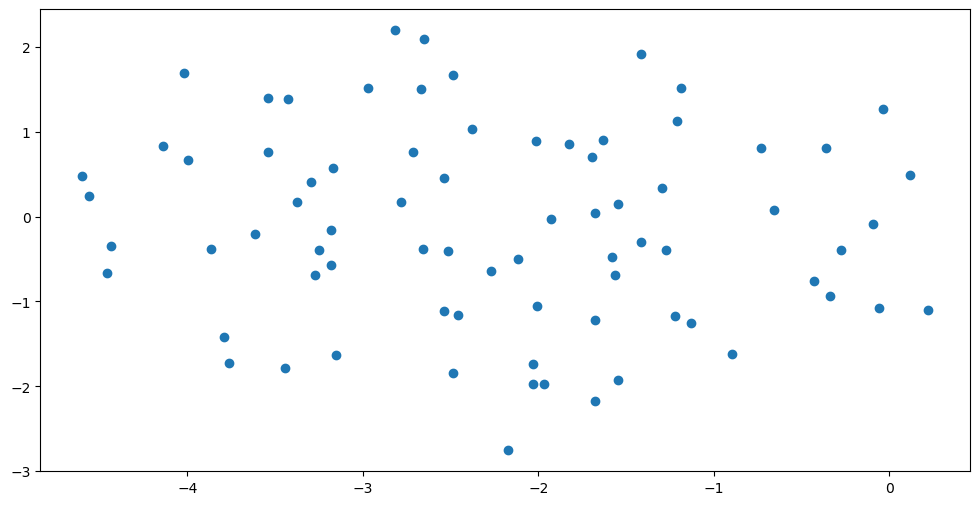

In [37]:
plt.figure(figsize=(12,6))
plt.scatter(x_new_embeddings[: , 0] , x_new_embeddings[:,1] , marker='o')

In [38]:
vocab

['machine',
 'learning',
 'data',
 'field',
 'models',
 'ai',
 'nlp',
 'proma',
 'processing',
 'image',
 'vision',
 'computer',
 'worked',
 'based',
 'implementing',
 'successfully',
 'pipelines',
 'record',
 'practical',
 'years',
 'four',
 'expertise',
 'number',
 'development',
 'science',
 'mlops',
 'latest',
 'knowledge',
 'enhancing',
 'engineer',
 'passionate',
 'tanjina',
 'im',
 'hi',
 'python',
 'introductory',
 'teach',
 'used',
 'using',
 'interested',
 'deep',
 'phone',
 'ml',
 'generative',
 'agentic',
 'try',
 'build',
 'two',
 'wordvec',
 'skipgram',
 'also',
 'work',
 'cleaning',
 'text',
 'lso',
 'known',
 'preprocessing',
 'tasks',
 'working',
 'love',
 'make',
 'enabling',
 'understand',
 'sequence',
 'information',
 'act',
 'accordingly',
 'significant',
 'amazing',
 'progress',
 'towards',
 'true',
 'artificial',
 'intelligence',
 'veyy',
 'name']

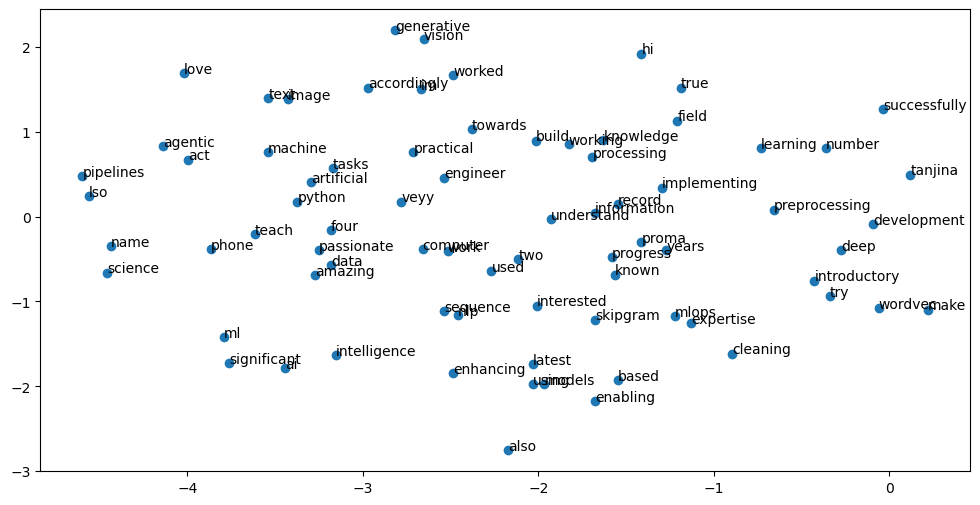

In [40]:
plt.figure(figsize=(12,6))
plt.scatter(x_new_embeddings[: , 0] , x_new_embeddings[:,1] , marker='o')

for i ,words in enumerate(vocab[:len(x_new_embeddings)]):
    plt.annotate(words,xy=(x_new_embeddings[i,0],x_new_embeddings[i,1]))
plt.show()   

In [42]:
text = "Barack Obama was the 44th President of the United States."

In [43]:
word_tokenize(text)

['Barack',
 'Obama',
 'was',
 'the',
 '44th',
 'President',
 'of',
 'the',
 'United',
 'States',
 '.']

In [44]:
from nltk import ne_chunk,pos_tag

In [46]:
pip install svgling



   ---------------------------------------- 0.0/67.1 kB ? eta -:--:--
   ------------------ --------------------- 30.7/67.1 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 67.1/67.1 kB 902.9 kB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


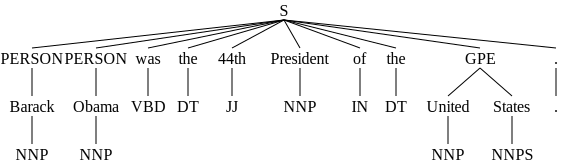

In [47]:
ne_chunk(pos_tag(word_tokenize(text)))